In [63]:
""" # Ruta a kaggle.json en Google Drive
drive_kaggle_json_path = '/content/drive/MyDrive/Procesamiento_Imagenes/Clase_9_TP/kaggle.json'

# Crear la carpeta .kaggle y copiar kaggle.json desde Google Drive
! mkdir -p ~/.kaggle
! cp {drive_kaggle_json_path} ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json  # Establecer permisos

# Instalar opendatasets y descargar el dataset
! pip install opendatasets --upgrade
import opendatasets as od

# Descargar el dataset desde Kaggle
dataset_url = 'https://www.kaggle.com/datasets/moltean/fruits'
od.download(dataset_url) """

" # Ruta a kaggle.json en Google Drive\ndrive_kaggle_json_path = '/content/drive/MyDrive/Procesamiento_Imagenes/Clase_9_TP/kaggle.json'\n\n# Crear la carpeta .kaggle y copiar kaggle.json desde Google Drive\n! mkdir -p ~/.kaggle\n! cp {drive_kaggle_json_path} ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json  # Establecer permisos\n\n# Instalar opendatasets y descargar el dataset\n! pip install opendatasets --upgrade\nimport opendatasets as od\n\n# Descargar el dataset desde Kaggle\ndataset_url = 'https://www.kaggle.com/datasets/moltean/fruits'\nod.download(dataset_url) "

In [64]:
""" # Instalar opendatasets y descargar el dataset
! pip install opendatasets --upgrade """

' # Instalar opendatasets y descargar el dataset\n! pip install opendatasets --upgrade '

In [65]:
""" # Instalar opendatasets y descargar el dataset
! pip install opendatasets --upgrade
import opendatasets as od

# Descargar el dataset desde Kaggle
dataset_url = 'https://www.kaggle.com/datasets/moltean/fruits'
od.download(dataset_url) """

" # Instalar opendatasets y descargar el dataset\n! pip install opendatasets --upgrade\nimport opendatasets as od\n\n# Descargar el dataset desde Kaggle\ndataset_url = 'https://www.kaggle.com/datasets/moltean/fruits'\nod.download(dataset_url) "

In [86]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


1. Inspección del Directorio y Número de Imágenes por Clase

Verifica la estructura de carpetas y el número de imágenes por clase:

In [66]:
import os

# Ruta al dataset:
dataset_path = 'P:/frutitas/fruits/fruits-360_dataset_100x100/fruits-360/'

# Listar las carpetas (clases) en el dataset
classes = os.listdir(os.path.join(dataset_path, 'Training'))
print(f"Total de clases: {len(classes)}")
print("Clases:", classes)

# Contar el número de imágenes por clase
for cls in classes:
    num_images = len(os.listdir(os.path.join(dataset_path, 'Training', cls)))
    print(f"Clase '{cls}': {num_images} imágenes")


Total de clases: 141
Clases: ['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple hit 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1', 'Grape Pink 1', 'Grape White 1', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink 1', '

2. Visualización de Imágenes de Muestra

Muestra algunas imágenes aleatorias de diferentes clases para familiarizarte con el dataset:

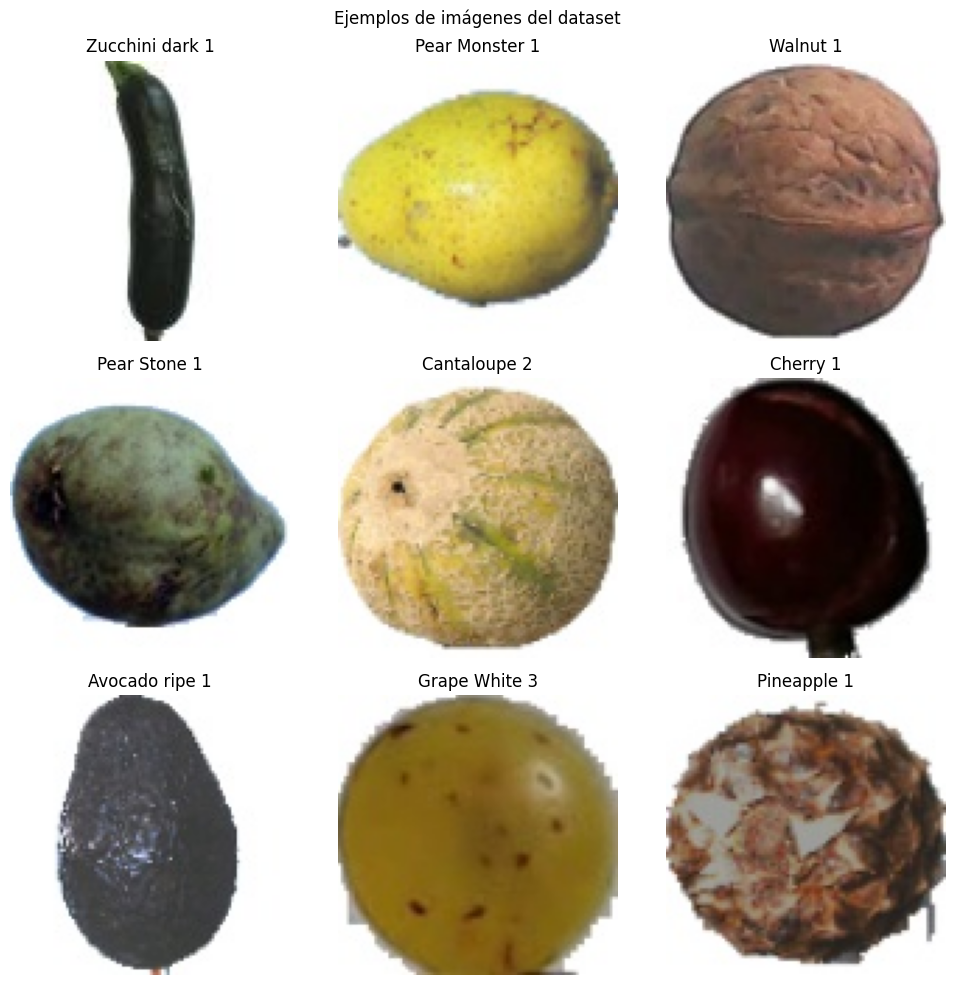

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Visualizar algunas imágenes al azar de diferentes clases
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Ejemplos de imágenes del dataset")

for i, ax in enumerate(axes.flat):
    cls = random.choice(classes)
    image_path = os.path.join(dataset_path, 'Training', cls, random.choice(os.listdir(os.path.join(dataset_path, 'Training', cls))))
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')

plt.tight_layout()
plt.show()


3. Revisión de Tamaño de Imágenes

Verifica el tamaño de las imágenes y si hay variaciones significativas:

In [68]:
from PIL import Image
import numpy as np

# Revisar tamaños de las imágenes en una clase
image_sizes = []

for cls in classes[:5]:  # Analiza algunas clases para tener una idea general
    image_files = os.listdir(os.path.join(dataset_path, 'Training', cls))
    for img_file in image_files[:5]:  # Revisa algunas imágenes por clase
        img_path = os.path.join(dataset_path, 'Training', cls, img_file)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

# Imprimir tamaños únicos encontrados
unique_sizes = np.unique(image_sizes, axis=0)
print("Tamaños de imagen únicos:", unique_sizes)


Tamaños de imagen únicos: [[100 100]]


4. Distribución de Imágenes por Clase

Muestra un gráfico de barras para ver la distribución de imágenes entre las diferentes clases:

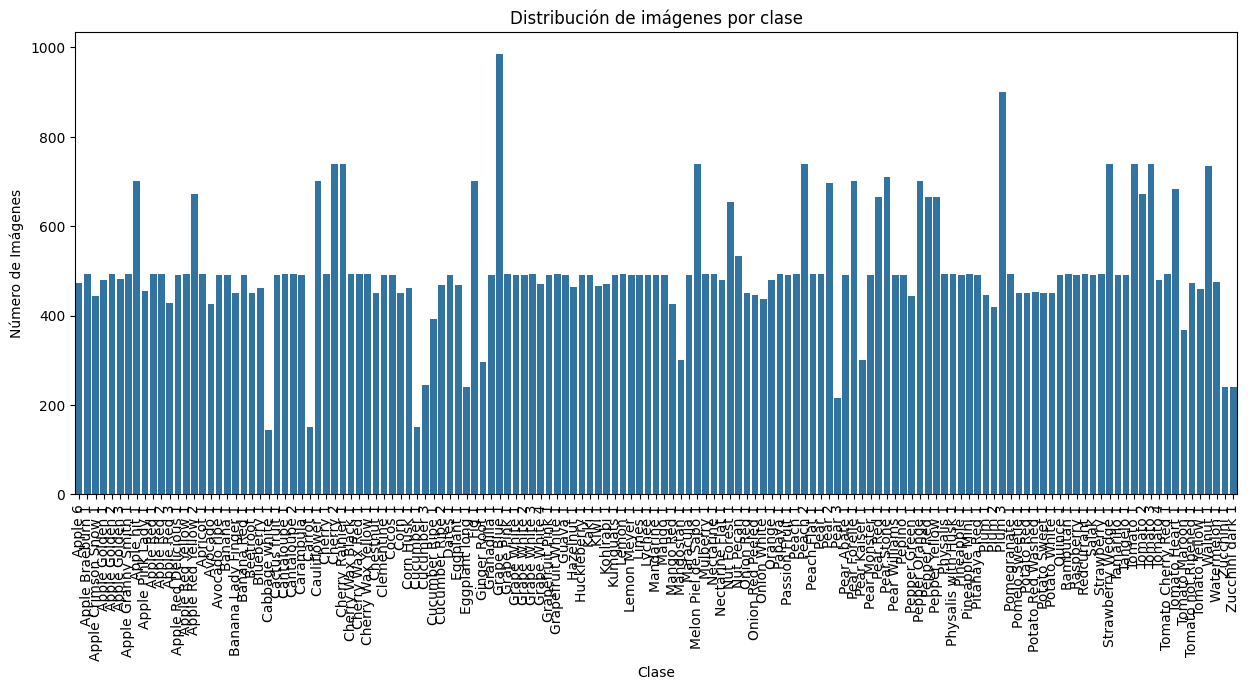

In [69]:
import pandas as pd
import seaborn as sns

class_counts = {cls: len(os.listdir(os.path.join(dataset_path, 'Training', cls))) for cls in classes}
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Clase', 'Número de Imágenes'])
# Extraer la lista de nombres de clases
class_names = class_counts_df['Clase'].tolist()
plt.figure(figsize=(15, 6))
sns.barplot(x='Clase', y='Número de Imágenes', data=class_counts_df)
plt.xticks(rotation=90)
plt.title('Distribución de imágenes por clase')
plt.show()


3. Implementación de la CNN

    Librerías necesarias:

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [71]:


num_classes = len(class_counts_df['Clase'].unique()) # Assuming 'Clase' is your class column


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes es el número de tipos de frutas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Flor\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Get the number of classes from your DataFrame
num_classes = len(class_counts_df['Clase'].unique()) # Assuming 'Clase' is your class column

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes for the output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'P:\\frutitas\\fruits\\fruits-360_dataset_100x100\\fruits-360\\Training',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'P:\\frutitas\\fruits\\fruits-360_dataset_100x100\\fruits-360\\Test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 56432 images belonging to 141 classes.
Found 4665 images belonging to 141 classes.


In [96]:


with tf.device('/GPU:0'):history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 177s 100ms/step - accuracy: 0.8653 - loss: 0.3979 - val_accuracy: 0.9254 - val_loss: 0.3566
Epoch 2/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 178s 101ms/step - accuracy: 0.8753 - loss: 0.3686 - val_accuracy: 0.9151 - val_loss: 0.3667
Epoch 3/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 177s 100ms/step - accuracy: 0.8741 - loss: 0.3780 - val_accuracy: 0.9406 - val_loss: 0.2888
Epoch 4/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 176s 100ms/step - accuracy: 0.8846 - loss: 0.3381 - val_accuracy: 0.9327 - val_loss: 0.2857
Epoch 5/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 176s 100ms/step - accuracy: 0.8923 - loss: 0.3250 - val_accuracy: 0.9370 - val_loss: 0.3153
Epoch 6/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 176s 100ms/step - accuracy: 0.8937 - loss: 0.3208 - val_accuracy: 0.9443 - val_loss: 0.2578
Epoch 7/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 175s 99ms/step - accuracy: 0.8973 - loss: 0.3128 - val_accuracy: 0.9370 - val_loss: 0.3186
Epoch 8/10
1764/1764 ━━━━━━━━━━━━━━━━━━━━ 177s 100ms/step - acc

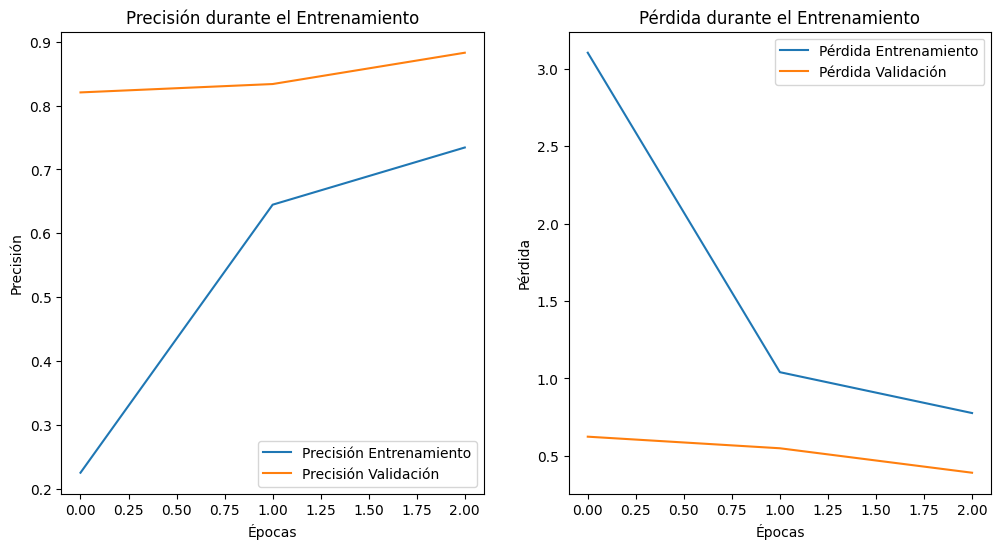

In [ ]:
import matplotlib.pyplot as plt

""" # Supongamos que tienes listas para almacenar las métricas
train_accuracy = [0.1965, 0.5968, 0.6772, 0.7232, 0.7475]
val_accuracy = [0.7571, 0.8484, 0.8587, 0.8795, 0.9023]
train_loss = [3.2799, 1.2152, 0.9583, 0.8199, 0.7361]
val_loss = [0.8168, 0.5075, 0.4567, 0.3821, 0.3319] """
""" """ # Épocas
epochs = [1, 2, 3]

# Métricas de entrenamiento
train_accuracy = [0.2255, 0.6449, 0.7344]
train_loss = [3.1049, 1.0407, 0.7767]

# Métricas de validación
val_accuracy = [0.8206, 0.8337, 0.8827]
val_loss = [0.6240, 0.5491, 0.3911]

# Graficar precisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Precisión Entrenamiento')
plt.plot(val_accuracy, label='Precisión Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


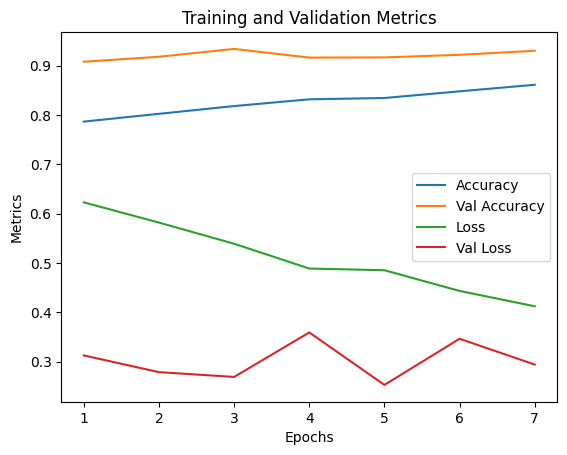

In [78]:
import matplotlib.pyplot as plt
epochs = [1, 2, 3, 4, 5, 6, 7]

accuracy = [0.7866, 0.8024, 0.8181, 0.8318, 0.8345, 0.8480, 0.8613]
loss = [0.6228, 0.5818, 0.5389, 0.4886, 0.4852, 0.4432, 0.4121]

val_accuracy = [0.9080, 0.9181, 0.9340, 0.9164, 0.9168, 0.9220, 0.9303]
val_loss = [0.3124, 0.2785, 0.2688, 0.3590, 0.2526, 0.3462, 0.2939]
plt.plot(epochs, accuracy, label='Accuracy')
plt.plot(epochs, val_accuracy, label='Val Accuracy')
plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Val Loss')

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()


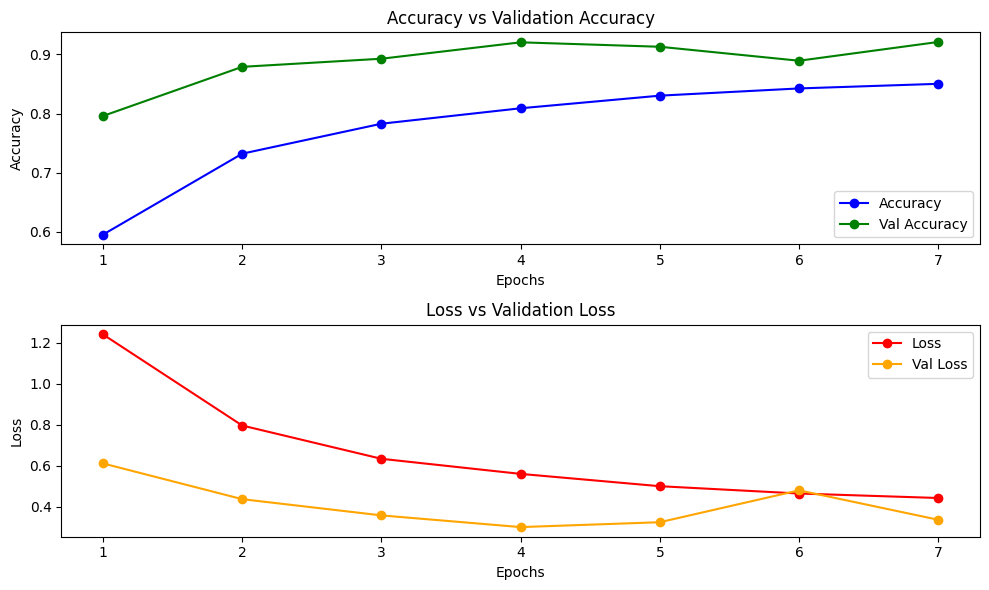

In [89]:
import matplotlib.pyplot as plt

# Datos
epochs = [1, 2, 3, 4, 5, 6, 7]
accuracy = [0.5955, 0.7322, 0.7828, 0.8089, 0.8302, 0.8424, 0.8502]
loss = [1.2415, 0.7967, 0.6342, 0.5605, 0.5004, 0.4647, 0.4428]
val_accuracy = [0.7959, 0.8789, 0.8926, 0.9203, 0.9128, 0.8892, 0.9209]
val_loss = [0.6116, 0.4371, 0.3578, 0.3007, 0.3245, 0.4802, 0.3365]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de precisión
plt.subplot(2, 1, 1)  # Gráfico de precisión en la parte superior
plt.plot(epochs, accuracy, label='Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', color='green', marker='o')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(2, 1, 2)  # Gráfico de pérdida en la parte inferior
plt.plot(epochs, loss, label='Loss', color='red', marker='o')
plt.plot(epochs, val_loss, label='Val Loss', color='orange', marker='o')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [97]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Obtener predicciones
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)




146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step
[[1 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


146/146 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step


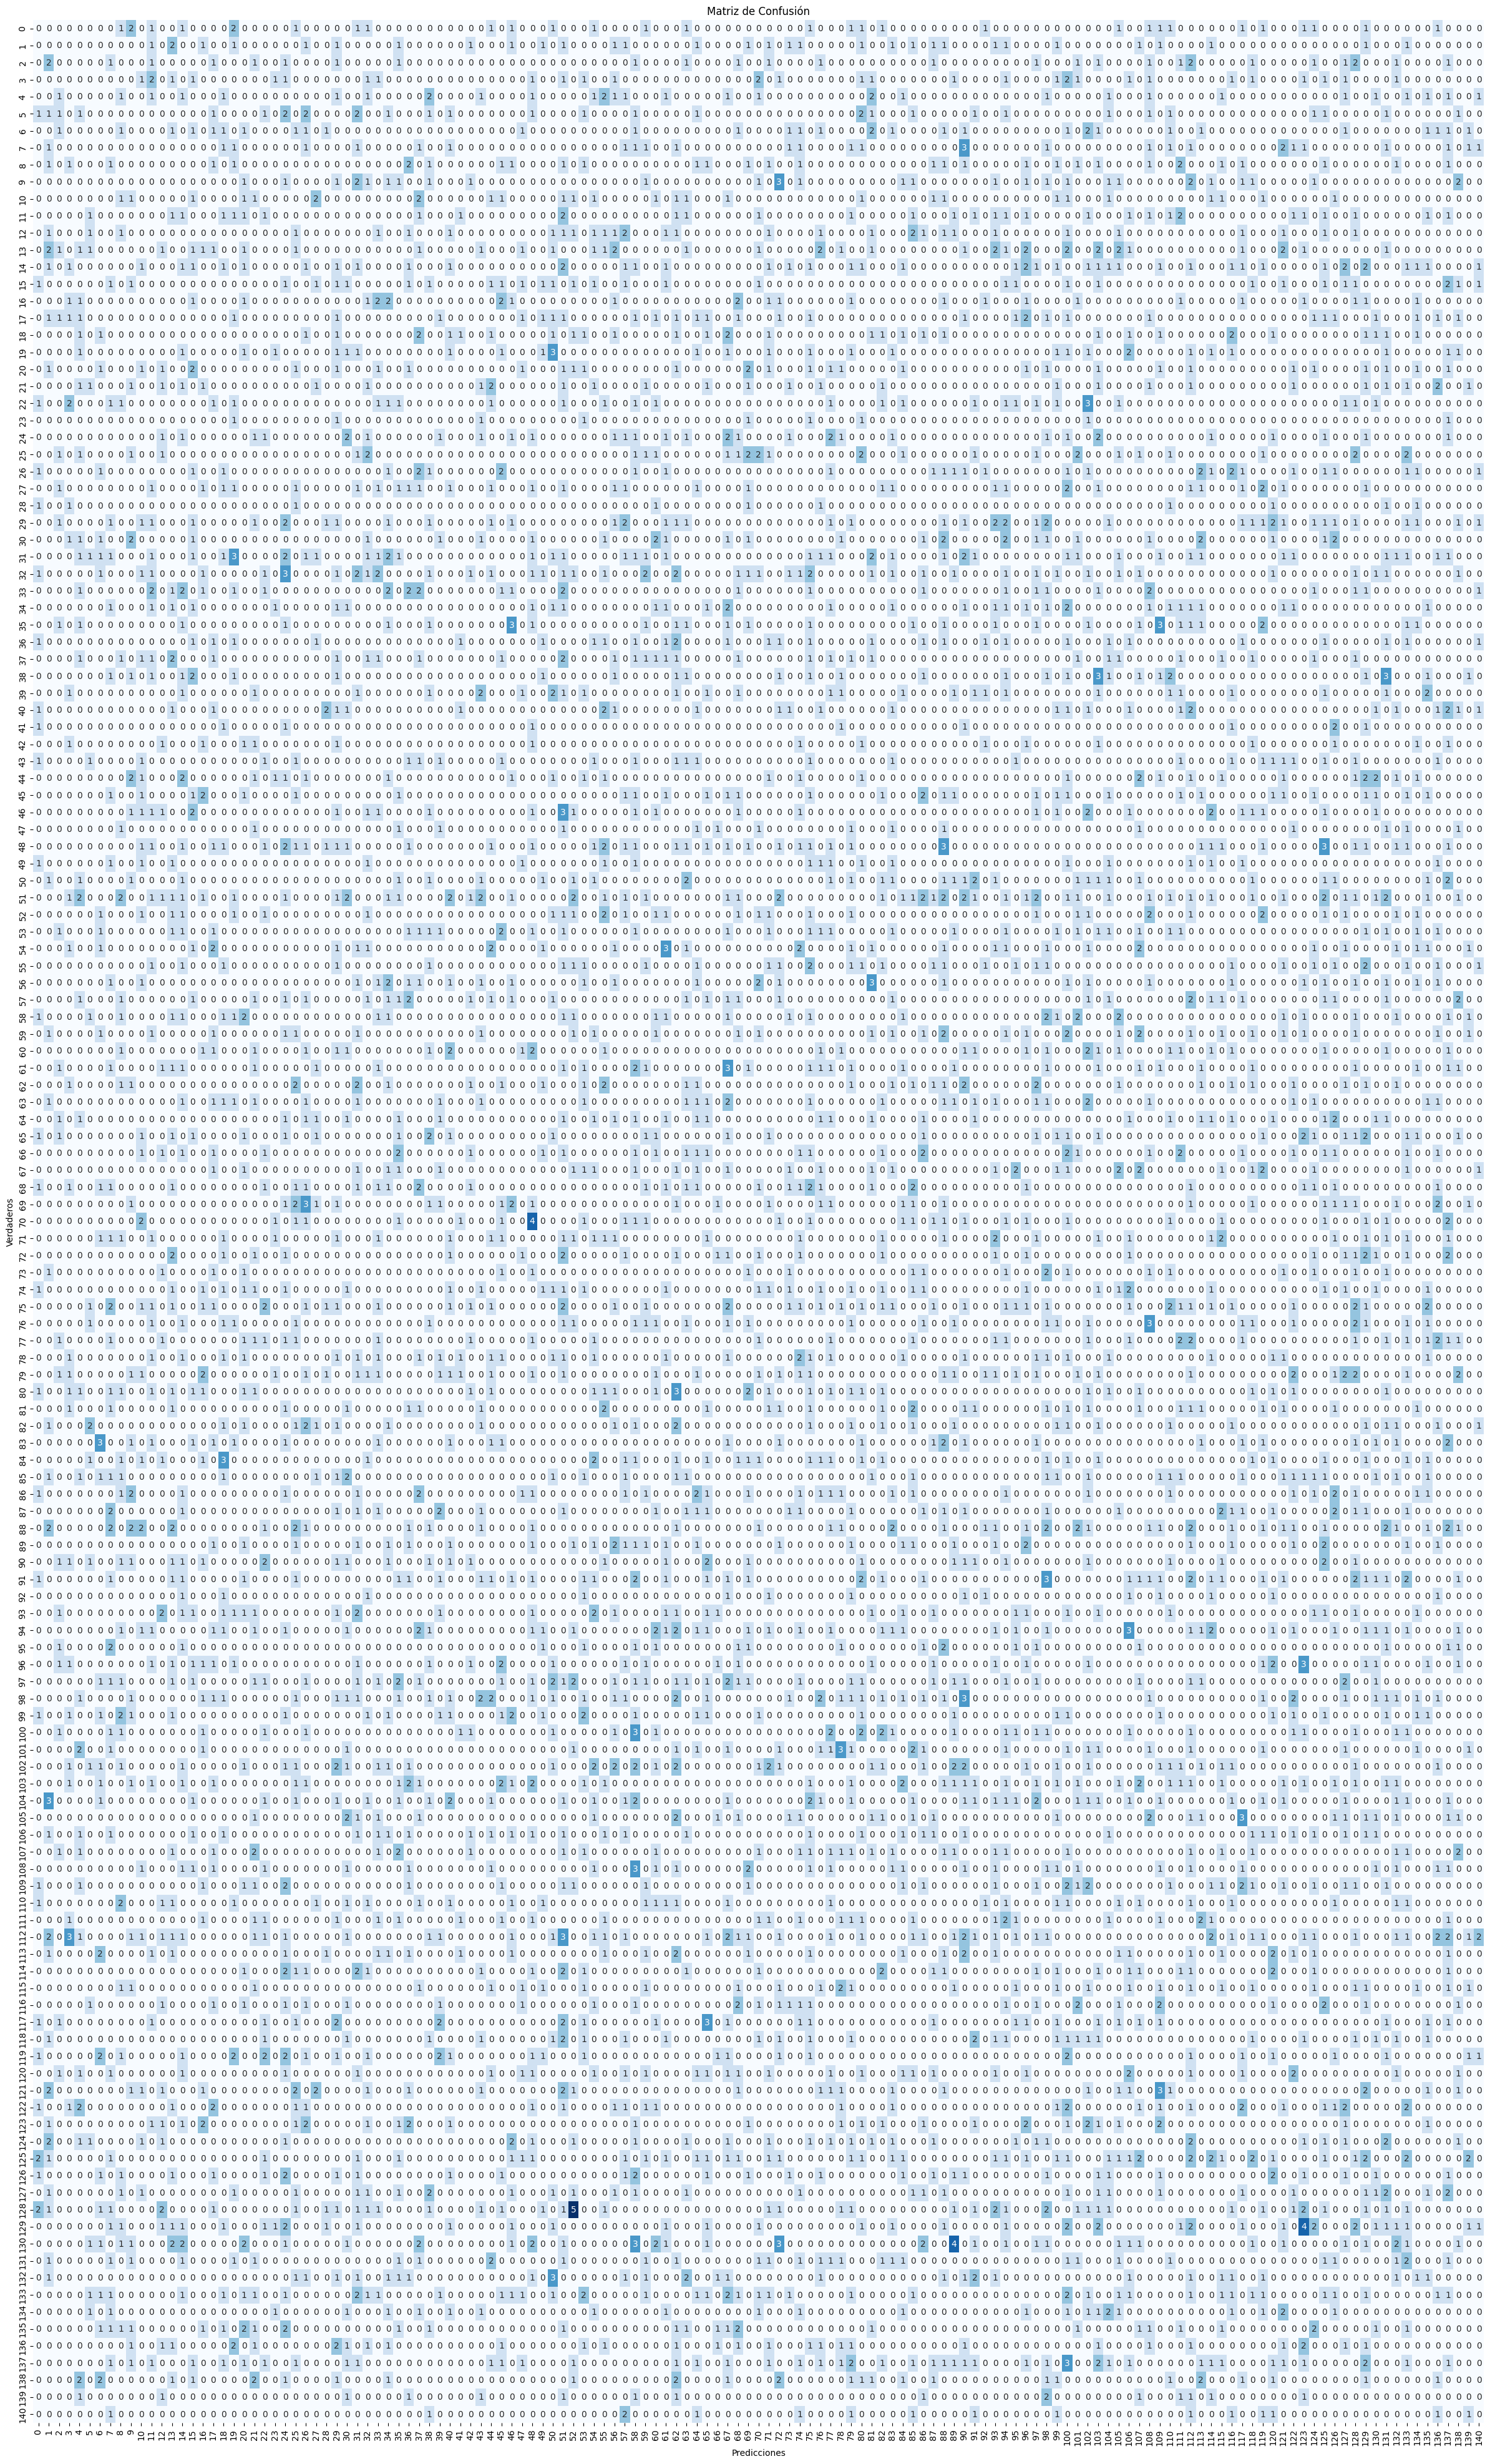

In [98]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener predicciones
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(30, 50))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
#plt.xticks(ticks=np.arange(len(validation_generator.class_indices)),
 #          labels=list(validation_generator.class_indices.keys()), rotation=45)
#plt.yticks(ticks=np.arange(len(validation_generator.class_indices)),
  #         labels=list(validation_generator.class_indices.keys()), rotation=0)
plt.show()


2. Preprocesar la Imagen

Aquí, cargamos la imagen, la redimensionamos y normalizamos para que tenga el mismo formato que las imágenes de entrenamiento.

In [118]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path, img_size=(100, 100)):
    # Cargar la imagen
    img = cv2.imread(image_path)

    # Redimensionar la imagen
    img = cv2.resize(img, img_size)

    # Convertir de BGR a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalizar la imagen
    img = img / 255.0  # Normalizar a [0, 1]

    # Agregar una dimensión para que sea compatible con el modelo (1, height, width, channels)
    img = np.expand_dims(img, axis=0)

    return img

# Cargar y preprocesar la imagen
image_path = 'P:\\frutitas\\prueba_IMG\\83_100.jpg'
preprocessed_image = load_and_preprocess_image(image_path)



3. Realizar la Predicción

Una vez que tienes la imagen preprocesada, puedes realizar la predicción:





In [119]:
# Realizar la predicción
predictions = model.predict(preprocessed_image)

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


4. Interpretar los Resultados

Ahora, interpreta los resultados de la predicción. Puedes mapear la clase predicha a su nombre correspondiente:

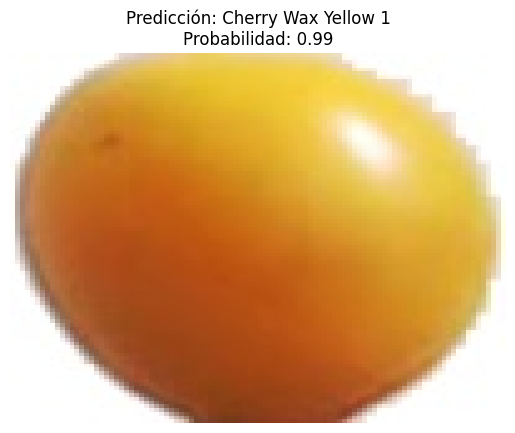

In [120]:
# Obtener el nombre de la clase correspondiente al índice predicho
predicted_class_name = [name for name, index in validation_generator.class_indices.items() if index == predicted_class][0]

# Mostrar la imagen con el título de la predicción y la probabilidad
plt.title(f'Predicción: {predicted_class_name}\nProbabilidad: {predicted_probability:.2f}')
plt.imshow(preprocessed_image.squeeze(), aspect='auto')
plt.axis('off')
plt.show()
